This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [26]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-MEDIUM-ITFW'
#MESH = 'TRI03-INTERMEDIATE-ITFW'
#MESH = 'TRI03-FINE-ITFW'
#MESH = 'TRI03-SUPERFINE-ITFW'
#MESH = 'TRI03-MEGAFINE-ITFW'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-MEDIUM-ITFW'
#MESH = 'TRI06-INTERMEDIATE-ITFW'
#MESH = 'TRI06-FINE-ITFW'
#MESH = 'TRI06-SUPERFINE-ITFW'
MESH = 'TRI06-MEGAFINE-ITFW'

###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI10-SUPERFINE-ITFW'


###### LINEAR QUADRILATERAL ELEMENT MESH
#MESH = 'QUA04-MEDIUM-ITFW'
#MESH = 'QUA04-INTERMEDIATE-ITFW'
#MESH = 'QUA04-FINE-ITFW'
#MESH = 'QUA04-SUPERFINE-ITFW'
#MESH = 'QUA04-MEGAFINE-ITFW'

###### QUADRATIC QUADRILATERAL ELEMENT MESH
#MESH = 'QUA09-MEDIUM-ITFW'
#MESH = 'QUA09-INTERMEDIATE-ITFW'
#MESH = 'QUA09-FINE-ITFW'
#MESH = 'QUA09-SUPERFINE-ITFW'
#MESH = 'QUA09-MEGAFINE-ITFW'


# RECTANGULAR MESH
#MESH = 'TRI03-FINE-RECTANGLE'
#MESH = 'TRI06-MEDIUM-RECTANGLE'

#MESH = 'TRI10-MEGAFINE-LINEAR'

In [27]:
##CREATE GRAD-SHAFRANOV PROBLEM WITH CHOSEN MESH
Equilibrium = GradShafranovSolver(MESH)

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY
READ MESH FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
Done!


In [28]:
## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = False
Equilibrium.GhostStabilization = True

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

In [29]:
# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.QuadratureOrder2D = 8   # ORDER OF NUMERICAL INTEGRATION QUADRATURES                    
Equilibrium.ext_maxiter = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3        # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4        # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.it_plasma = 0           # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Equilibrium.beta = 1.0e4            # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.zeta = 1.0e-2           # GHOST PENALTY PARAMETER
Equilibrium.PSIrelax = False
Equilibrium.alphaPSI = 1.0          # INITIAL AIKITEN'S RELAXATION PARAMETER
Equilibrium.PHIrelax = False
Equilibrium.alphaPHI = 0.5
Equilibrium.R0_axis = 6.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 1.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = -3.5          # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50         # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6       # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

In [30]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS
# COILS
coil1 = Coil(index = 1,
             dim = Equilibrium.dim,
             X = np.array([3.9431,7.5741]),
             I = 5.73e6)
coil2 = Coil(index = 2,
             dim = Equilibrium.dim,
             X = np.array([8.2851,6.5398]),
             I = -2.88e6)
coil3 = Coil(index = 3,
             dim = Equilibrium.dim,
             X = np.array([11.9919,3.2752]),
             I = -5.81e6)
coil4 = Coil(index = 4,
             dim = Equilibrium.dim,
             X = np.array([11.9630,-2.2336]),
             I = -4.78e6)
coil5 = Coil(index = 5,
             dim = Equilibrium.dim,
             X = np.array([ 8.3908,-6.7269]),
             I = -7.81e6)
coil6 = Coil(index = 6,
             dim = Equilibrium.dim,
             X = np.array([4.3340, -7.4665]),
             I = 16.94e6)
Equilibrium.COILS = [coil1, coil2, coil3, coil4, coil5, coil6]
   
# SOLENOIDS
solenoid1 = Solenoid(index = 1,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, -5.415],
                                    [1.696, -3.6067]]),
                     I = 5.3e6,
                     Nturns = 1)
solenoid2 = Solenoid(index = 2,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, -3.6067],
                                    [1.696, -1.7983]]),
                     I = -10.3e6,
                     Nturns = 1)
solenoid3 = Solenoid(index = 3,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, -1.7983],
                                    [1.696, 0.0]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid4 = Solenoid(index = 4,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, 0.0],
                                    [1.696, 1.8183]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid5 = Solenoid(index = 5,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, 1.8183],
                                    [1.696, 3.6267]]),
                     I = -4.05e6,
                     Nturns = 1)
solenoid6 = Solenoid(index = 6,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, 3.6267],
                                    [1.696, 5.435]]),
                     I = -4.82e6,
                     Nturns = 1)
Equilibrium.SOLENOIDS = [solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

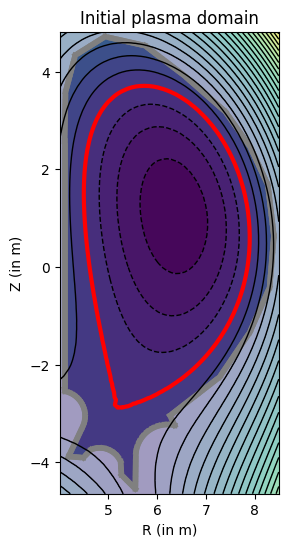

In [31]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

"""
X_SADDLE = np.array([5.2, -2.8])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.7])
"""

"""
X_SADDLE = np.array([5.4, -2.9])
X_RIGHT = np.array([7.8, 0.4])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.4])
"""

X_SADDLE = np.array([5.2, -2.9])
X_RIGHT = np.array([7.9, 0.6])
X_LEFT = np.array([4.5, 1.5])
X_TOP = np.array([5.9, 3.7])

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

Equilibrium.initialPHI.Plot()

In [32]:
Equilibrium.InitialiseMESH()

PREPROCESS MESH AND INITIALISE MESH ITEMS...
     -> INITIALISE SIMULATION PARAMETERS...Done!
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.004399748165324323 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.1005513372441991 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·39.78067432644476
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
Done!


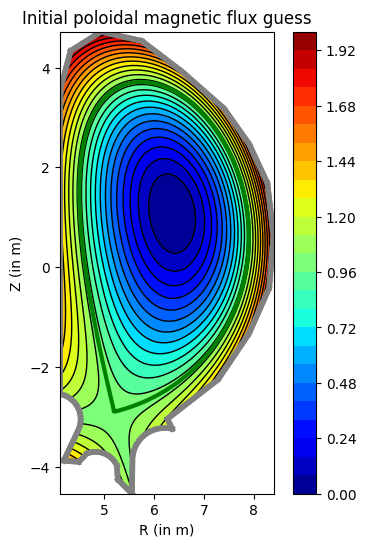

In [33]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

"""
X_SADDLE = np.array([5.2, -2.8])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.7])
"""

"""
X_SADDLE = np.array([5.4, -2.9])
X_RIGHT = np.array([7.8, 0.4])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.4])
"""

X_SADDLE = np.array([5.2, -2.9])
X_RIGHT = np.array([7.9, 0.6])
X_LEFT = np.array([4.5, 1.5])
X_TOP = np.array([5.9, 3.7])


X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

"""
def PSI0(X):
    return
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""


Equilibrium.initialPSI.Plot()

In [34]:
Equilibrium.InitialisePSI()

     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!


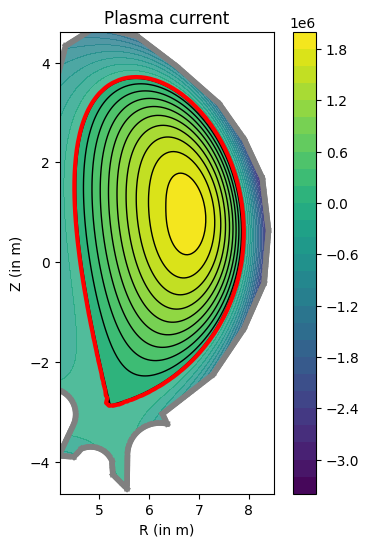

In [35]:
### DEFINE PLASMA CURRENT MODEL

# LINEAR MODEL
"""
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'LINEAR',  # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS          
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# ZHENG MODEL
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'ZHENG',   # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# NONLINEAR MODEL
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'NONLINEAR', # PREDEFINED MODEL
                                     R0 = 6.0)            # MEAN RADIUS
"""


# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Equilibrium.mu0*(R0**2)*q0*kappa)

"""
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = -15e6)  # TOTAL PLASMA CURRENT
"""

"""
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

Equilibrium.IntegratePlasmaDomain(Equilibrium.PlasmaCurrent.Jphi)

Equilibrium.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE SIMULATION ARRAYS ...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
     -> ASSIGN INITIAL BOUNDARY VALUES...Done!
Done!


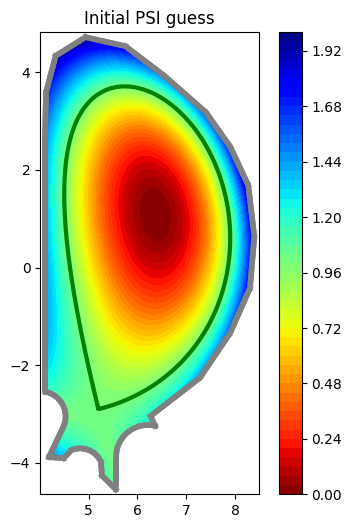

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  14999999.999999981
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.45559334, 0.81111532]), -10.599130764722227, 2212)]
Xpoint =  [(array([ 5.00956686, -3.14949389]), 0.8230448471432201, 3504)]
LOCAL EXTREMUM AT  [6.45559334 0.81111532]  (ELEMENT  2212 ) WITH VALUE PSI_0 =  -10.599130764722227
SADDLE POINT AT  [ 5.00956686 -3.14949389]  (ELEMENT  3504 ) WITH VALUE PSI_X =  0.8230448471432201


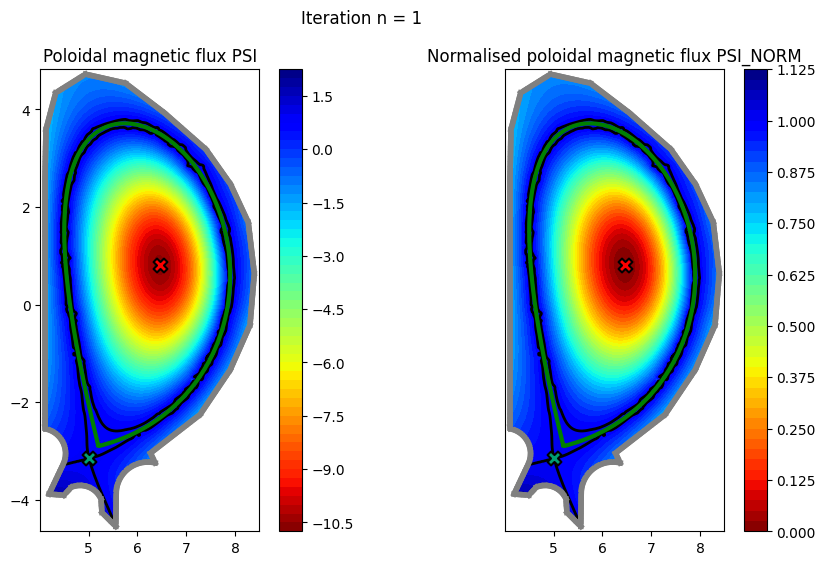

Internal iteration =  1 , PSI_NORM residu =  0.36152451433335925
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  15000000.00000011
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.49172911, 0.73145656]), -12.772314514923417, 1912)]
Xpoint =  [(array([ 5.1030454 , -3.09233939]), 0.8221178698691395, 3369)]
LOCAL EXTREMUM AT  [6.49172911 0.73145656]  (ELEMENT  1912 ) WITH VALUE PSI_0 =  -12.772314514923417
SADDLE POINT AT  [ 5.1030454  -3.09233939]  (ELEMENT  3369 ) WITH VALUE PSI_X =  0.8221178698691395


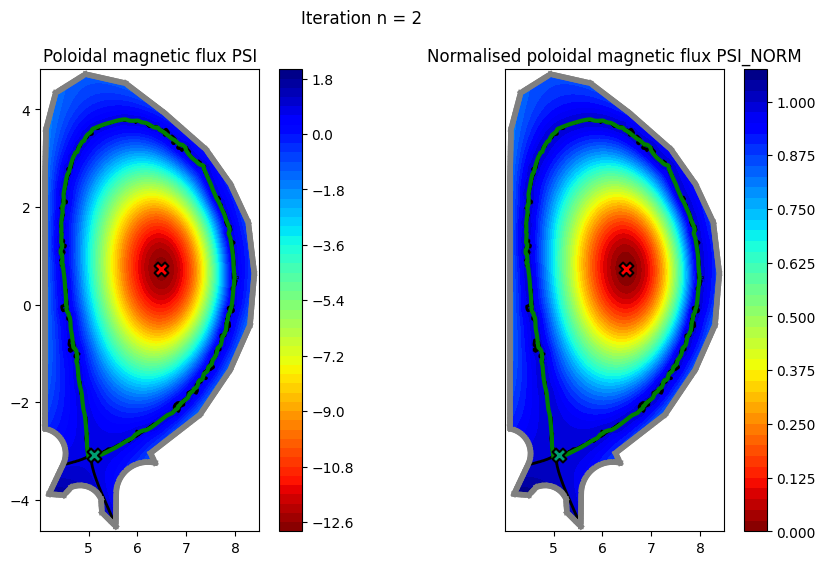

Internal iteration =  2 , PSI_NORM residu =  0.03747078913282989
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  14999999.999999758
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.50780717, 0.69678235]), -12.306714264888292, 1909)]
Xpoint =  [(array([ 5.12599077, -3.08794507]), 0.8214068007087846, 3369)]
LOCAL EXTREMUM AT  [6.50780717 0.69678235]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.306714264888292
SADDLE POINT AT  [ 5.12599077 -3.08794507]  (ELEMENT  3369 ) WITH VALUE PSI_X =  0.8214068007087846


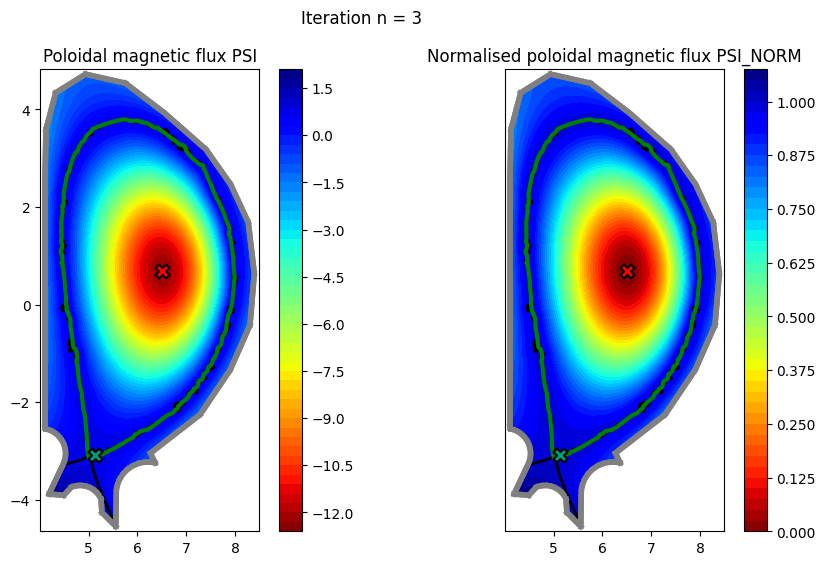

Internal iteration =  3 , PSI_NORM residu =  0.008638596769072639
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  15000000.00000059
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51326653, 0.68003025]), -12.281523897789077, 1909)]
Xpoint =  [(array([ 5.12895987, -3.08775602]), 0.8207620258857729, 3369)]
LOCAL EXTREMUM AT  [6.51326653 0.68003025]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.281523897789077
SADDLE POINT AT  [ 5.12895987 -3.08775602]  (ELEMENT  3369 ) WITH VALUE PSI_X =  0.8207620258857729


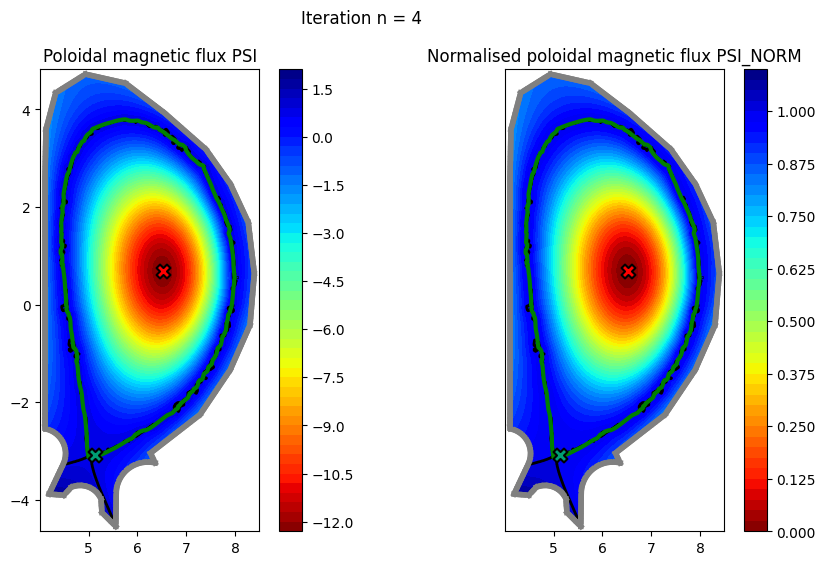

Internal iteration =  4 , PSI_NORM residu =  0.0035021955926674356
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  15000000.000000047
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51498323, 0.67181027]), -12.282439872656829, 1909)]
Xpoint =  [(array([ 5.13034845, -3.08773036]), 0.8201549022903272, 3369)]
LOCAL EXTREMUM AT  [6.51498323 0.67181027]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.282439872656829
SADDLE POINT AT  [ 5.13034845 -3.08773036]  (ELEMENT  3369 ) WITH VALUE PSI_X =  0.8201549022903272


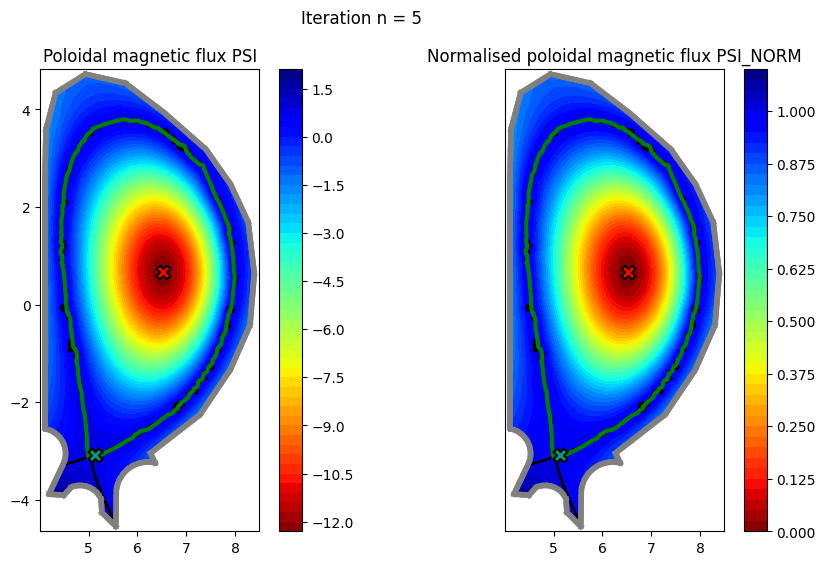

Internal iteration =  5 , PSI_NORM residu =  0.0016201572539668032
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  14999999.999999916
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51552992, 0.66778356]), -12.284045702249594, 1909)]
Xpoint =  [(array([ 5.13121936, -3.08775116]), 0.8195743431709279, 3369)]
LOCAL EXTREMUM AT  [6.51552992 0.66778356]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.284045702249594
SADDLE POINT AT  [ 5.13121936 -3.08775116]  (ELEMENT  3369 ) WITH VALUE PSI_X =  0.8195743431709279


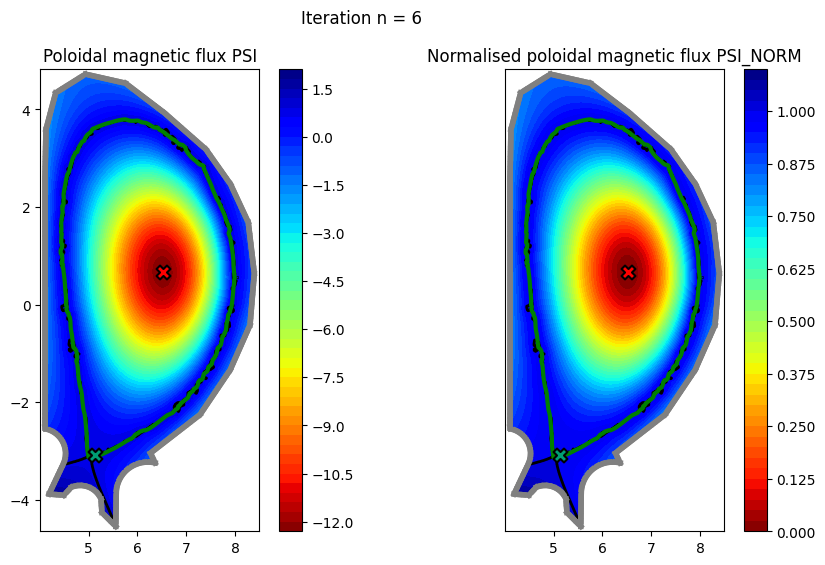

Internal iteration =  6 , PSI_NORM residu =  0.0007725614416404814
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  14999999.999999953
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51571229, 0.66581742]), -12.284961795031125, 1909)]
Xpoint =  [(array([ 5.13184658, -3.08779107]), 0.819014672281644, 3369)]
LOCAL EXTREMUM AT  [6.51571229 0.66581742]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.284961795031125
SADDLE POINT AT  [ 5.13184658 -3.08779107]  (ELEMENT  3369 ) WITH VALUE PSI_X =  0.819014672281644


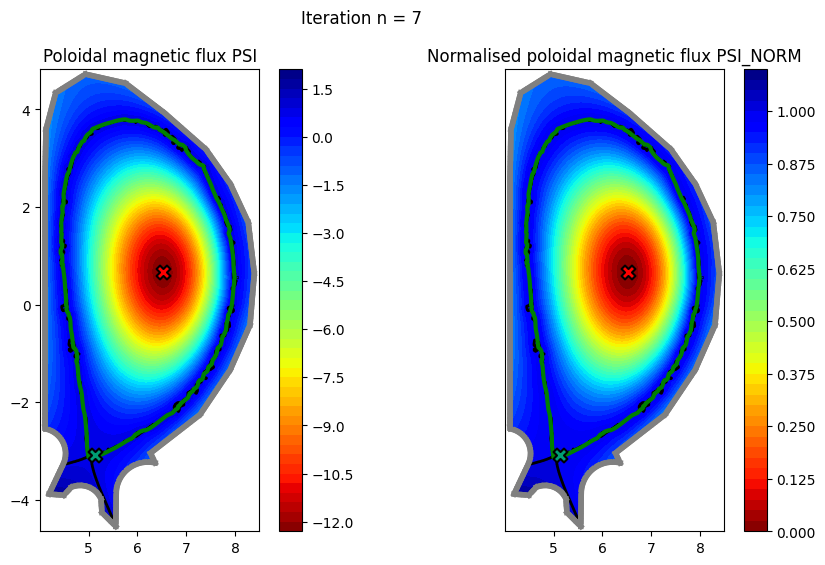

Internal iteration =  7 , PSI_NORM residu =  0.0003730343243788904
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  14999999.999999955
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.5157769 , 0.66485971]), -12.285557090835749, 1909)]
Xpoint =  [(array([ 5.13234891, -3.0878387 ]), 0.8184728425534228, 3369)]
LOCAL EXTREMUM AT  [6.5157769  0.66485971]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.285557090835749
SADDLE POINT AT  [ 5.13234891 -3.0878387 ]  (ELEMENT  3369 ) WITH VALUE PSI_X =  0.8184728425534228


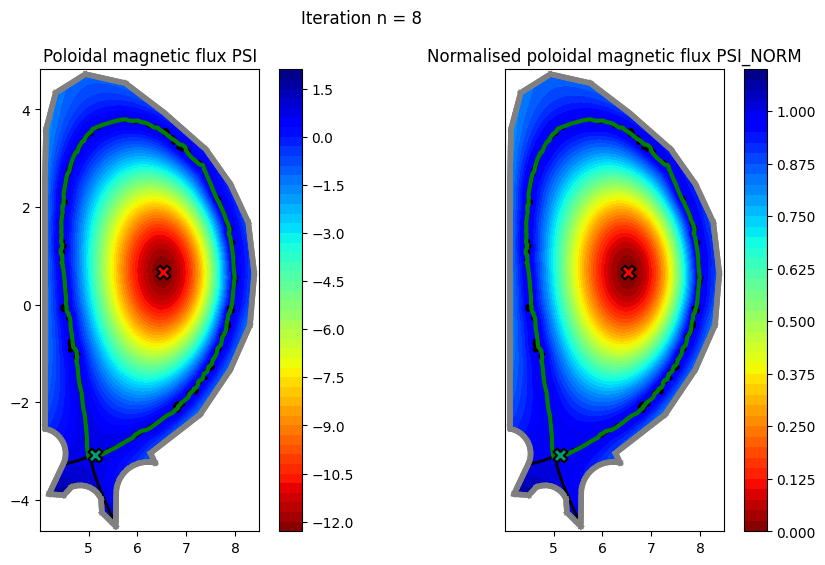

Internal iteration =  8 , PSI_NORM residu =  0.0001816329504752816
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  14999999.999999667
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.5158013, 0.6643937]), -12.286053244389633, 1909)]
Xpoint =  [(array([ 5.1327846 , -3.08788852]), 0.8179471897284852, 3369)]
LOCAL EXTREMUM AT  [6.5158013 0.6643937]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.286053244389633
SADDLE POINT AT  [ 5.1327846  -3.08788852]  (ELEMENT  3369 ) WITH VALUE PSI_X =  0.8179471897284852


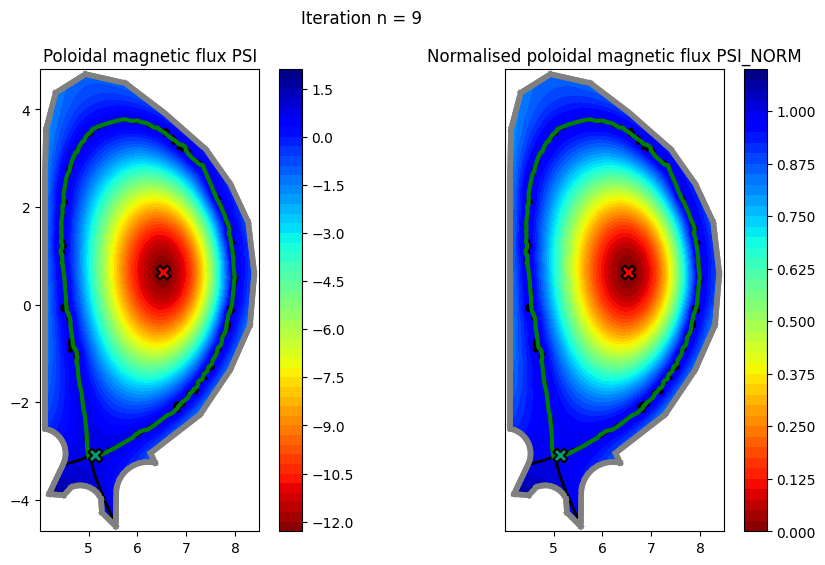

Internal iteration =  9 , PSI_NORM residu =  8.979623044414682e-05
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  1 , PSI_B residu =  0.5120724660566155
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  15000000.000000374
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51591778, 0.66396598]), -12.288456319667844, 1909)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.51591778 0.66396598]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.288456319667844
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.1327846  -3.08788852]  (ELEMENT  3369 ) WITH VALUE PSI_X =  0.8179471897284852


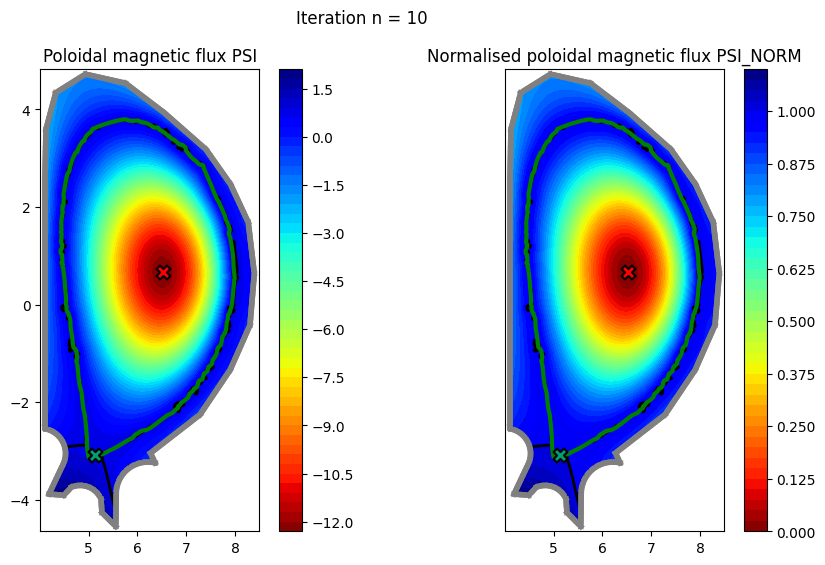

Internal iteration =  1 , PSI_NORM residu =  0.022947543742738385
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Total current =  15000000.000000201
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51597027, 0.66368527]), -12.285947029336239, 1909)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.51597027 0.66368527]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.285947029336239
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.1327846  -3.08788852]  (ELEMENT  3369 ) WITH VALUE PSI_X =  0.8179471897284852


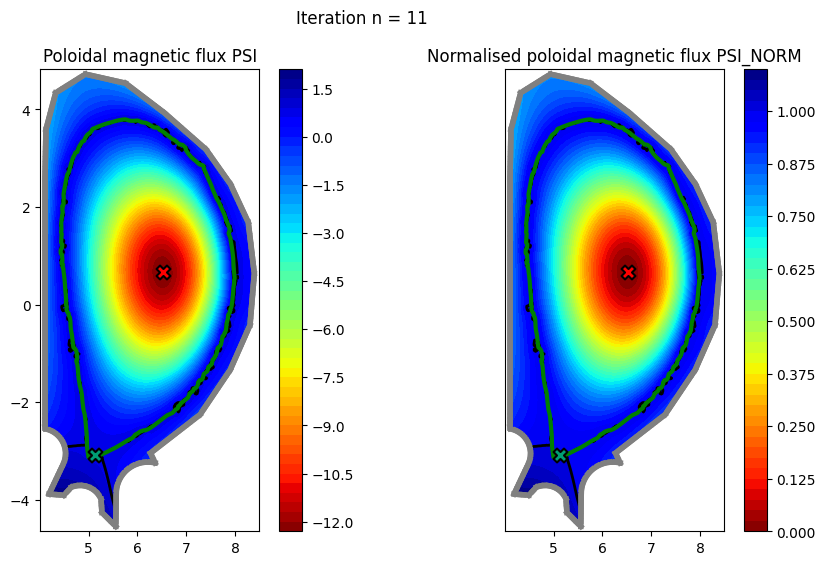

Internal iteration =  2 , PSI_NORM residu =  7.119858030435087e-05
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  2 , PSI_B residu =  0.0020453856219399863
 
OUTER ITERATION = 3 , INNER ITERATION = 1
     Total current =  14999999.999999963
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51598731, 0.66352986]), -12.285504163077064, 1909)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.51598731 0.66352986]  (ELEMENT  1909 ) WITH VALUE PSI_0 =  -12.285504163077064
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.1327846  -3.08788852]  (ELEMENT  3369 ) WITH VALUE PSI_X =  0.8179471897284852


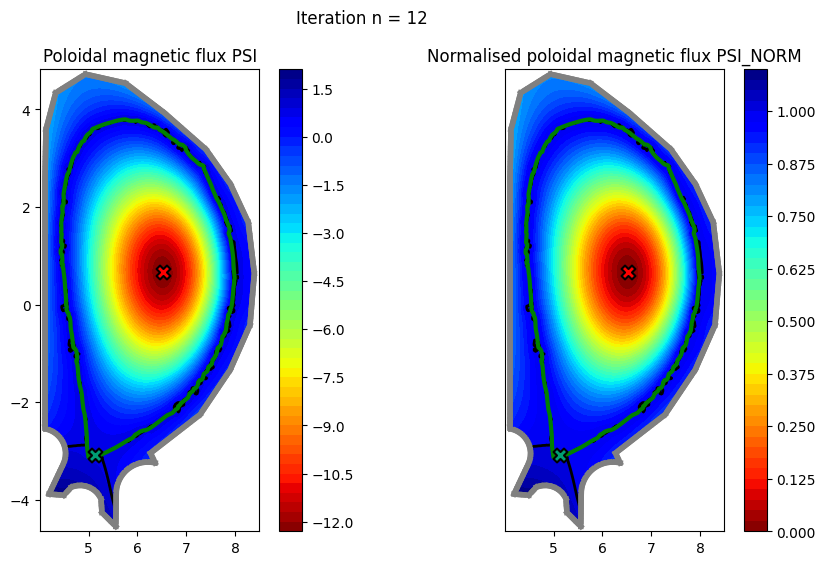

Internal iteration =  1 , PSI_NORM residu =  9.692233614101095e-05
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  3 , PSI_B residu =  0.0002430421876860541
 
SOLUTION CONVERGED


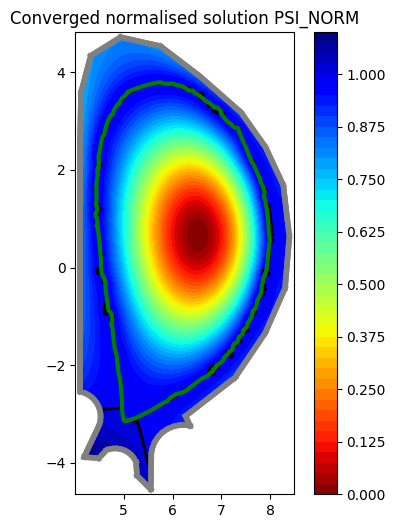

In [36]:
## NAME SIMULATION CASE 
CASE = 'TS-FREE-APEC-ITFW'

## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)

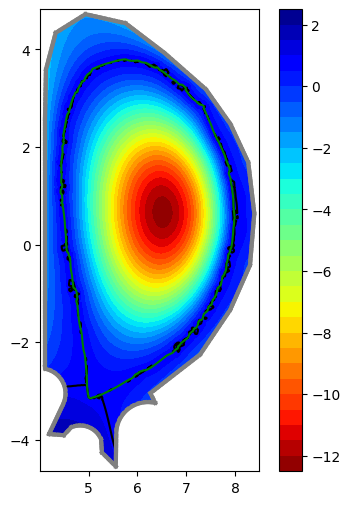

In [37]:
Equilibrium.PlotPSI()

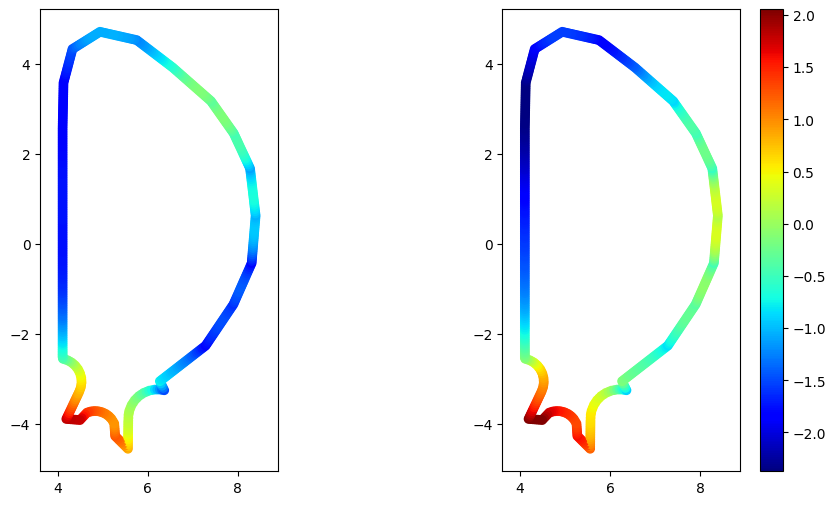

In [38]:
self = Equilibrium

cmap = plt.get_cmap('jet')

norm = plt.Normalize(np.min([self.PSI_B_sim[0].min(),self.PSI_B_sim[1].min()]),np.max([self.PSI_B_sim[0].max(),self.PSI_B_sim[1].max()]))

fig, axs = plt.subplots(1, 2, figsize=(11,6))
axs[0].set_aspect('equal')
axs[0].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[0].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors0 = cmap(norm(self.PSI_B_sim[0]))
axs[0].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors0)

axs[1].set_aspect('equal')
axs[1].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[1].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors1 = cmap(norm(self.PSI_B_sim[1]))
axs[1].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=axs[1])


In [4]:
import numpy as np
from scipy.integrate import quad

self = Equilibrium

def P(psinorm):
    shapeintegral, _ = quad(
        func = lambda x: (1.0 - x**self.PlasmaCurrent.alpha),
        a = 0.0, 
        b = psinorm)
    return self.PlasmaCurrent.L*self.PlasmaCurrent.Beta*(self.PSI_X - self.PSI_0)*shapeintegral / self.PlasmaCurrent.R0

n = 50
psi_norm = np.linspace(0,1,n)
Pprofile = np.zeros([n])
for i, psi in enumerate(psi_norm):
    Pprofile[i] = P(psi)
    
plt.plot(psi_norm,Pprofile,'-o')

NameError: name 'Equilibrium' is not defined